# "2019 August One Day Holding Long Short Portfolio BackTest"
> "2019 August Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [13]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [14]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [15]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190801].loc[df_testp.Date<20190901].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [16]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20190801,1.0,-4.686368,1.000000
1,20190802,-1.0,4.280510,0.953136
2,20190802,1.0,-1.090585,0.993935
3,20190805,1.0,0.000000,0.983096
4,20190806,1.0,1.548356,0.983096
5,20190807,1.0,0.000000,0.998318
6,20190808,1.0,1.903772,0.998318
7,20190809,1.0,-1.108925,1.017323
8,20190813,1.0,-70.313719,1.006042
9,20190814,1.0,8.740137,0.298656


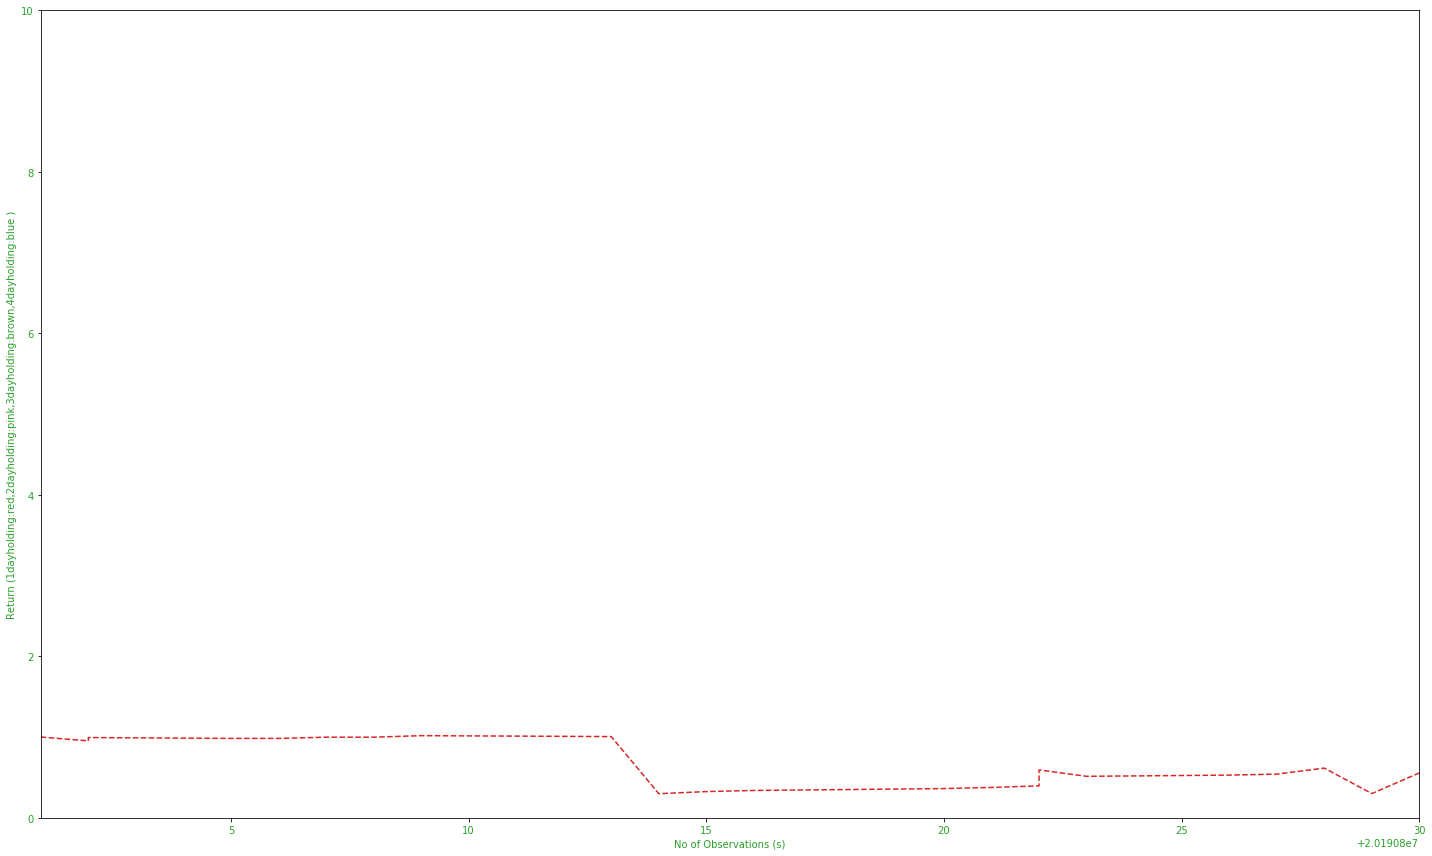

In [18]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [19]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20190801,1.0,-4.686368,1.000000
1,20190802,1.0,-1.090585,0.953136
2,20190805,1.0,0.000000,0.942742
3,20190806,1.0,1.548356,0.942742
4,20190807,1.0,0.000000,0.957339
5,20190808,1.0,1.903772,0.957339
6,20190809,1.0,-1.108925,0.975564
7,20190813,1.0,-70.313719,0.964746
8,20190814,1.0,8.740137,0.286397
9,20190815,1.0,4.247202,0.311429


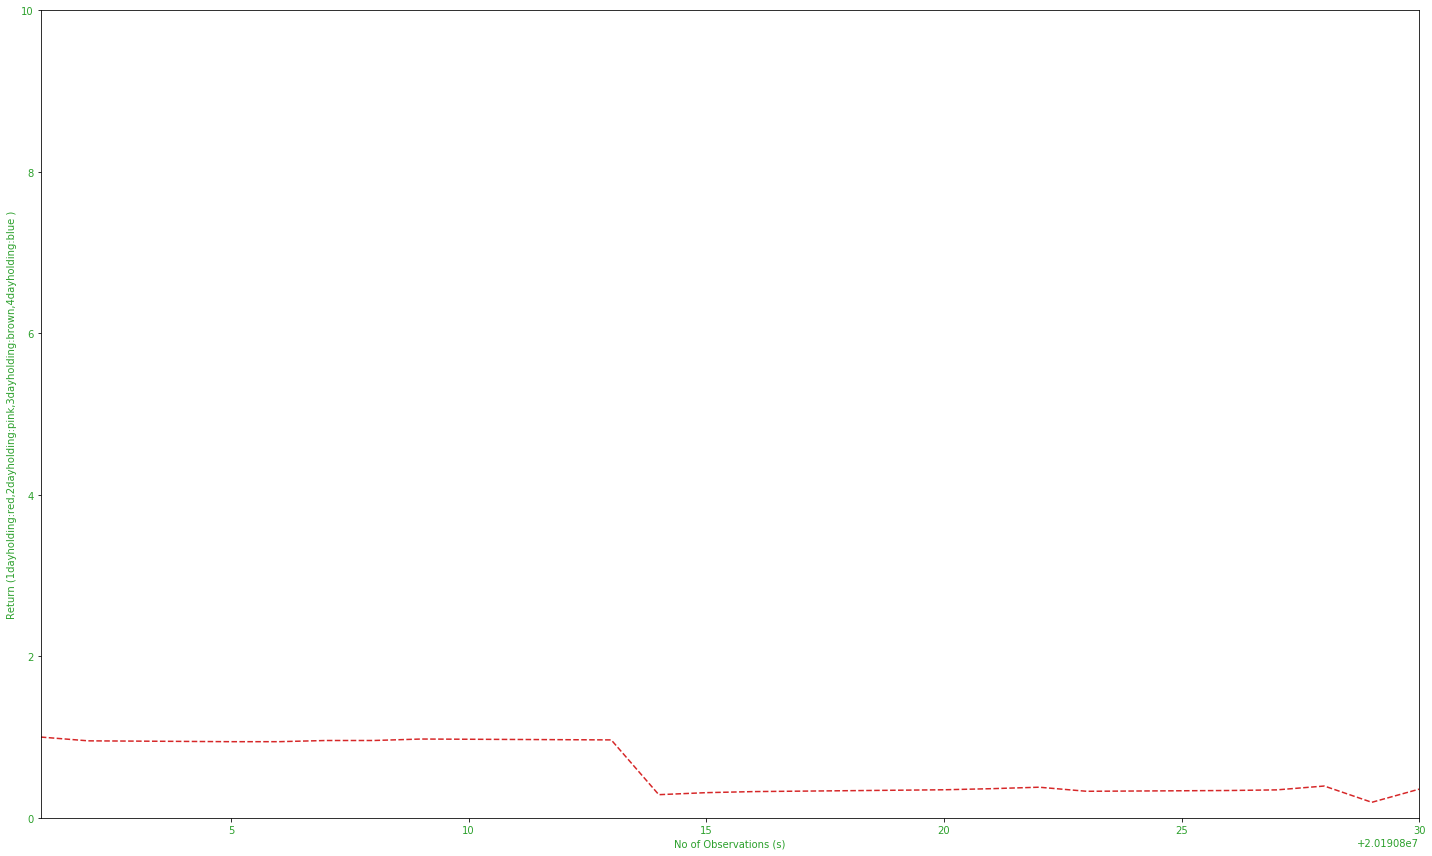

In [21]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [22]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20190802,-1.0,4.28051,1.000000
1,20190822,-1.0,50.00000,1.042805
2,20190829,-1.0,0.00000,1.564208


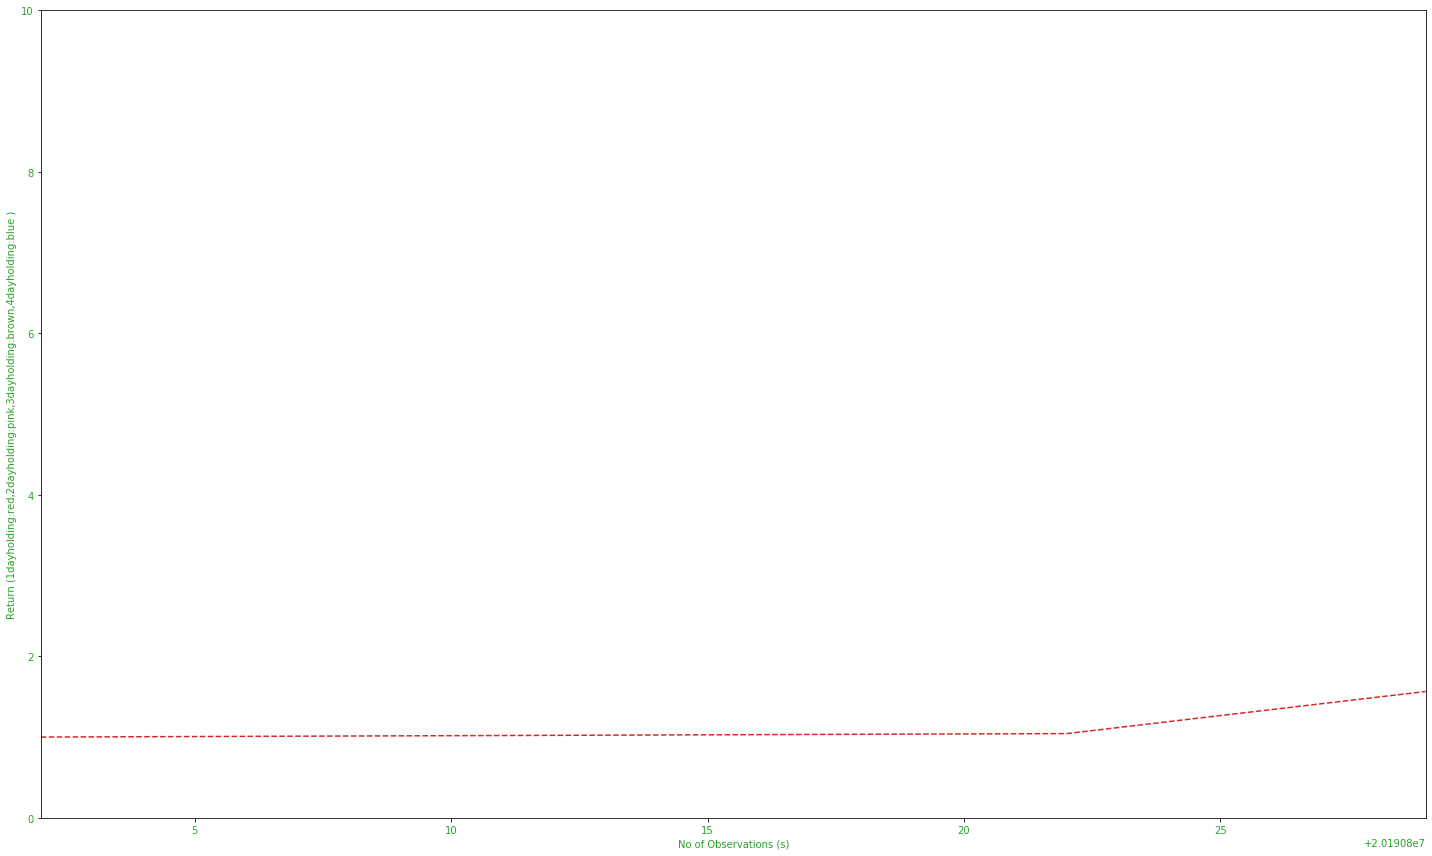

In [24]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()